In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [ ]:
import os
os.listdir(project_path)

['Untitled0.ipynb',
 'BCPIncidents.xlsx',
 'naivebaise model.ipynb',
 'Untitled1.ipynb',
 'V1_Copy_of_Capstone_Project_NLP_Solution_2.ipynb',
 'ticket_new.csv',
 'Untitled2.ipynb',
 'Automated Ticket Allocation.ipynb']

In [ ]:
file_name ='BCPIncidents.xlsx'

In [ ]:
import pandas as pd
import numpy as np
import re
import sys
itTicketDF=pd.read_excel(project_path+file_name,dtype= {'Description': str} )
itTicketDF.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Incident ID Raw,Incident ID,Incident,Description,Number,Year,CSS NG Follow Up,Customer Category,Customer,Customer Name,...,Time at Customer (Seconds),Time at Customer,PS: Nexus Area,Error Category Group,Error Category,Error Category Cluster,Active System,CIM Request,Planned Solution Selivery,#Incidents
0,002075129400002201482018,220148/2018,1830220148,Validation NEWGL Scenario - SAP session,NaN,NaN,NaN,External,42142,Akzo Nobel Decorative Coatings B.V.,...,3933637,"45 days, 12 hours",FIN AIS,NaN,NaN,No Error Category Assigned,NaN,NaN,NaT,1
1,002075129400003570792020,357079/2020,2030357079,Session Info in Secure Area!,NaN,NaN,NaN,External,1091729,3 E Handels- und Dienstleistungs-AG,...,4099547,"47 days, 10 hours",FIN AIS,NaN,NaN,No Error Category Assigned,NaN,NaN,NaT,1
2,002075129500006787852021,678785/2021,2140678785,Message for SV Session Mitsubishi SP2 starting...,NaN,NaN,NaN,NaN,1107353,<0001107353>,...,2652362,"30 days, 16 hours",FIN AIS,NaN,NaN,No Error Category Assigned,ServiceNow,NaN,NaT,1
3,002075129400001666142018,166614/2018,1830166614,TV_Service Session_Technical_Pre-Requisi,NaN,NaN,NaN,External,1244851,Vodafone Limited,...,9912,"2 hours, 45 minutes",FIN AIS,NaN,NaN,No Error Category Assigned,NaN,NaN,NaT,1
4,002075129400001830922021,183092/2021,2130183092,Finished second test migration and technical p...,NaN,NaN,NaN,External,3670525,Amprion GmbH,...,717318,"8 days, 7 hours",FIN AIS,NaN,NaN,No Error Category Assigned,NaN,NaN,NaT,1


In [ ]:
#Check for blanks

itTicketDF.isna().sum()

Incident ID Raw                  0
Incident ID                      0
Incident                         0
Description                     58
Number                       12947
                             ...  
Error Category Cluster           0
Active System                 8457
CIM Request                  12929
Planned Solution Selivery    12944
#Incidents                       0
Length: 108, dtype: int64

In [ ]:
itTicketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12947 entries, 0 to 12946
Columns: 108 entries, Incident ID Raw to #Incidents
dtypes: datetime64[ns](7), float64(8), int64(12), object(81)
memory usage: 10.7+ MB


In [ ]:
sample = itTicketDF.groupby(['Component'])
regroup=[]
for grp in itTicketDF['Component'].unique():
  if(sample.get_group(grp).shape[0]<10):
    regroup.append(grp)
print('Found {} groups which have under 10 samples'.format(len(regroup)))
itTicketDF['Component']=itTicketDF['Component'].apply(lambda x : 'misc_grp' if x in regroup  else x)

# Unique Groups check
itTicketDF['Component'].unique()

Found 3 groups which have under 10 samples


array(['FI-GL-MIG-SS', 'FI-GL-MIG-TL', 'CA-DT-CNV-S4C', 'CA-DT-MIG',
       'CA-DT-MIG-AFS', 'CA-DT-MIG-S4', 'misc_grp', 'CA-EUR',
       'CA-EUR-CNV', 'CA-EUR-CUR', 'CA-LT-ANA', 'CA-LT-BW4', 'CA-LT-CNV',
       'CA-TDM', 'CA-TDM-BPL', 'CA-TDM-BUS', 'CA-TDM-BUS-BI',
       'CA-TDM-BUS-ERP', 'CA-TDM-BUS-GTS', 'CA-TDM-BUS-SCM', 'CA-TDM-FRM',
       'CA-TDM-FRM-DTL', 'CA-TDM-FRM-PCL', 'CA-TDM-HCM', 'CA-TDM-IS-R',
       'CA-TDM-IS-U', 'CA-TDM-SCR', 'CA-TDM-SHL', 'FIN-MIG-CCS',
       'LOD-LE-MIG-MWB', 'SRD-CC-MIG-DMC', 'SV-SMG-CCM-CDM', 'CA-LT',
       'CA-LT-CNV-S4C'], dtype=object)

<ipython-input-9-d40659d4301d>:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


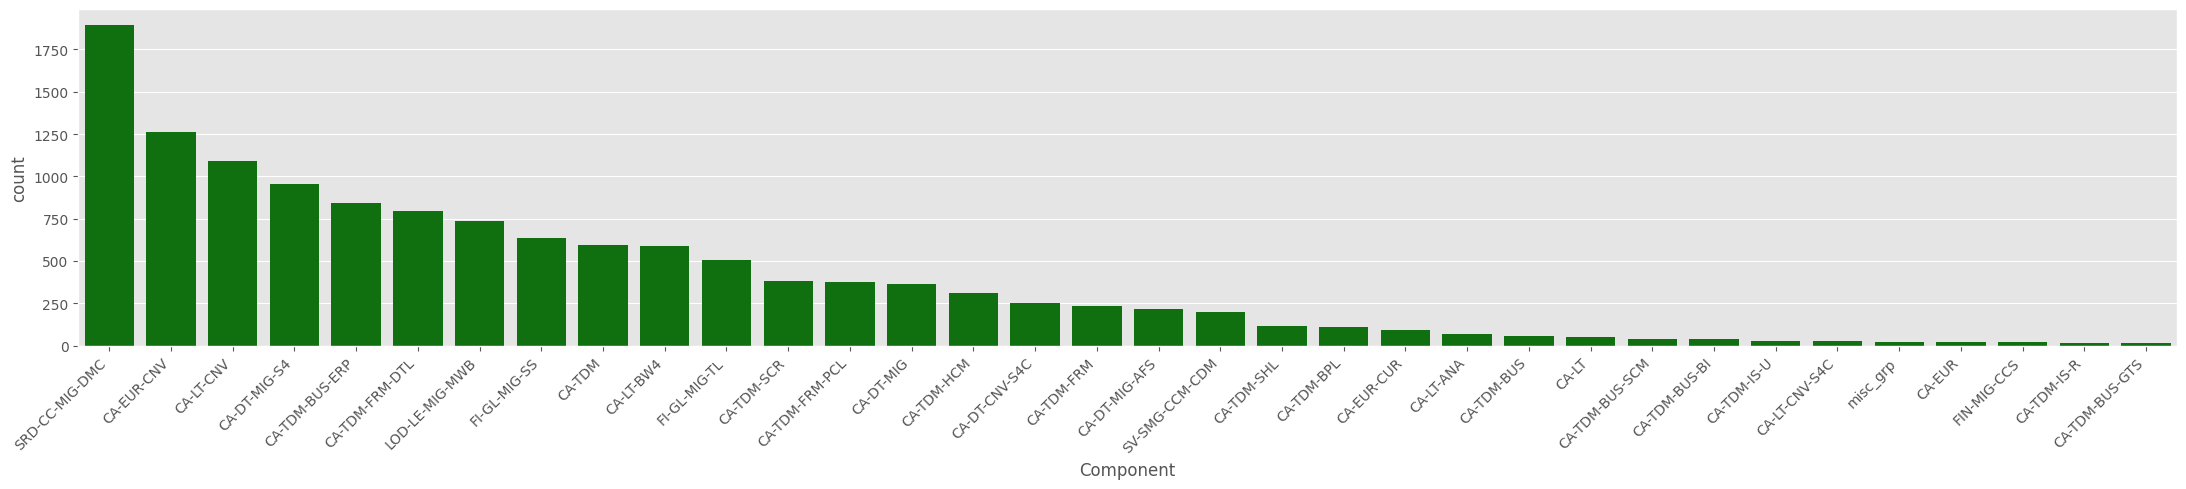

In [ ]:
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
import matplotlib.pyplot as plt
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = itTicketDF['Component'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate
ax=sns.countplot(x='Component', data=itTicketDF, color='green',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#Fill 'Decsription' field entries that have null with blank space
itTicketDF['Description'].fillna(value=' ', inplace=True)

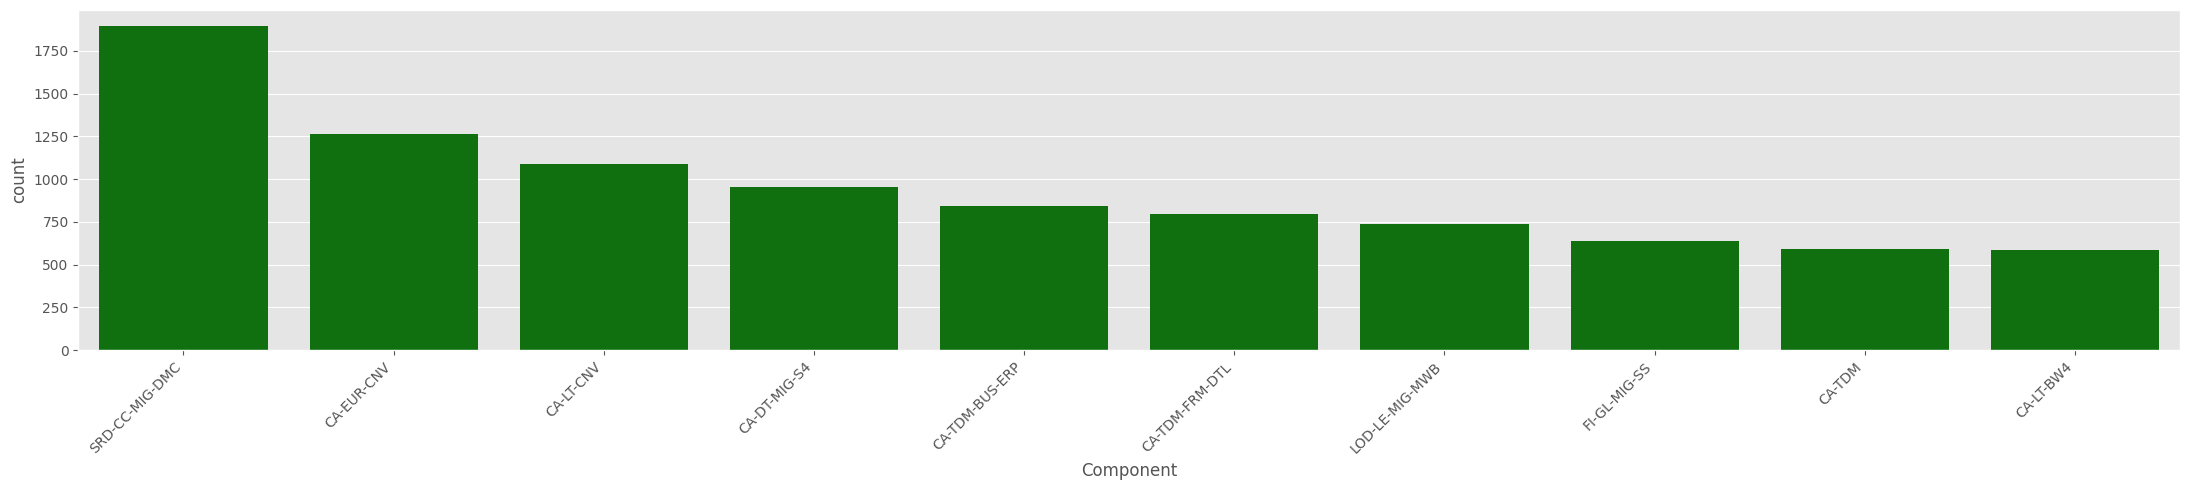

In [ ]:
top_10_components = itTicketDF['Component'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only these top components
filtered_df = itTicketDF[itTicketDF['Component'].isin(top_10_components)]

descending_order = filtered_df['Component'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate
ax=sns.countplot(x='Component', data=itTicketDF, color='green',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
itTicketDF = filtered_df

In [ ]:
def clean_data(text):
    text=text.lower()
 #   text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"for:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #&
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF')
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    #for name in callers:
     # namelist = [part for part in name.split()]
      #for namepart in namelist:
       #   text = text.replace(namepart,'')

    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

itTicketDF['Description'] = itTicketDF['Description'].apply(clean_data)

<ipython-input-13-4a56bf285f8a>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'] = itTicketDF['Description'].apply(clean_data)


In [ ]:
#Cleaning teh data by picking the words from the description and omitting words which has length less than 3 and keeps the words with a separator
itTicketDF['length']=[len(text) for text in itTicketDF['Description']]
itTicketDF=itTicketDF[itTicketDF['length']>=3]
itTicketDF['Description'] = itTicketDF['Description'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))

<ipython-input-14-8f34fbb2f56e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['length']=[len(text) for text in itTicketDF['Description']]
<ipython-input-14-8f34fbb2f56e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'] = itTicketDF['Description'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))


In [ ]:
# add a deep copy to another dataframe itTicketDF  to other DF
data =  itTicketDF.copy()
data['num_words'] = data.Description.apply(lambda x : len(x.split()))
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Incident,9330.0,2.142885e+09,3.212191e+08,1.830000e+09,1.940146e+09,2.130373e+09,2.230932e+09,3.500500e+09
Number,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer,9330.0,9.870677e+06,1.526760e+07,3.087600e+04,1.088026e+06,1.240440e+06,1.211839e+07,5.045236e+07
Service Product ID,92.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tenant ID,2872.0,7.410969e+08,6.881236e+05,7.400022e+08,7.404887e+08,7.410616e+08,7.415103e+08,7.435830e+08
Product Group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IRT Duration (Seconds),9330.0,3.931143e+04,7.202329e+05,0.000000e+00,0.000000e+00,2.485000e+03,1.365500e+04,5.978421e+07
ORT Hits,9330.0,5.135048e-01,1.495511e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
ORT Misses,9330.0,5.862808e-02,4.359416e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01


In [ ]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [ ]:
word_distribution

,bins,counts
0,0-100,9329
1,100-300,0
2,300-500,0
3,500-800,0
4,>800,0


Text(0.5, 1.0, 'Word distribution per bin')

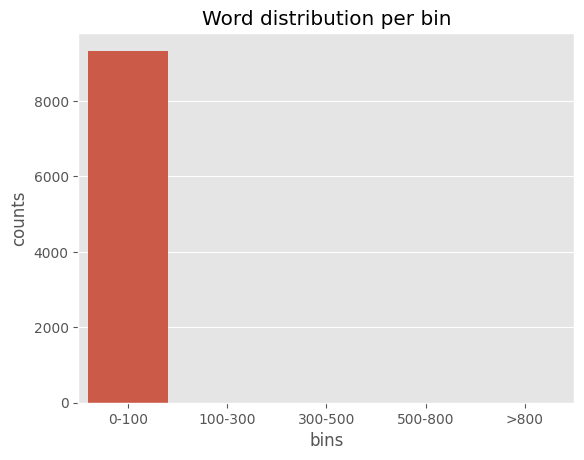

In [ ]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

**Observation**

*   All of the descrption of the problems raised by callers are short with in 0-100 words



MODELLING

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

sr = stopwords.words('english')
for i,text in enumerate(itTicketDF['Description']):
  itTicketDF['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

Streaming output truncated to the last 5000 lines.
<ipython-input-19-a9d7a7883522>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)
<ipython-input-19-a9d7a7883522>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)
<ipython-input-19-a9d7a7883522>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
!pip install -q spacy
import spacy

In [ ]:
import sys
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_sm")
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

itTicketDF['Description'] = itTicketDF['Description'].apply(lemmatize_text)

<ipython-input-21-696b0f563c33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'] = itTicketDF['Description'].apply(lemmatize_text)


In [ ]:
!pip install -q pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [ ]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [ ]:
import spacy

In [ ]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
combined_text=itTicketDF.Description.values.tolist()

In [ ]:
combined_text[1]

'session info secure area'

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [ ]:
print(data_words[1])

['session', 'info', 'secure', 'area']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset
data = itTicketDF

# Split the data into training and testing sets
X = data['Description']
y = data['Component']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Perform grid search for hyperparameter tuning
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)
best_classifier = grid_search.best_estimator_

# Make predictions
y_pred = best_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.59
Best Parameters: {'alpha': 1.0}
Classification Report:
                precision    recall  f1-score   support

  CA-DT-MIG-S4       0.63      0.74      0.68       286
    CA-EUR-CNV       0.66      0.83      0.74       397
     CA-LT-BW4       0.46      0.13      0.20       167
     CA-LT-CNV       0.52      0.74      0.61       327
        CA-TDM       0.55      0.34      0.42       176
CA-TDM-BUS-ERP       0.86      0.31      0.46       249
CA-TDM-FRM-DTL       0.00      0.00      0.00       230
  FI-GL-MIG-SS       0.97      0.94      0.96       210
LOD-LE-MIG-MWB       0.36      0.02      0.04       217
SRD-CC-MIG-DMC       0.48      0.93      0.64       540

      accuracy                           0.59      2799
     macro avg       0.55      0.50      0.47      2799
  weighted avg       0.55      0.59      0.52      2799



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset

data = itTicketDF #pd.read_csv('tickets.csv')  # Assuming 'tickets.csv' contains 'description' and 'component' columns

# Split the data into training and testing sets
X = data['Description']
y = data['Component']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a text classification model (Random Forest in this example)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.54
Classification Report:
                precision    recall  f1-score   support

  CA-DT-MIG-S4       0.61      0.80      0.69       182
    CA-EUR-CNV       0.67      0.73      0.69       274
     CA-LT-BW4       0.43      0.25      0.32       120
     CA-LT-CNV       0.54      0.72      0.61       215
        CA-TDM       0.57      0.39      0.46       129
CA-TDM-BUS-ERP       0.63      0.35      0.45       171
CA-TDM-FRM-DTL       0.04      0.02      0.03       140
  FI-GL-MIG-SS       0.93      0.93      0.93       135
LOD-LE-MIG-MWB       0.19      0.07      0.11       149
SRD-CC-MIG-DMC       0.46      0.67      0.55       351

      accuracy                           0.54      1866
     macro avg       0.51      0.49      0.48      1866
  weighted avg       0.52      0.54      0.51      1866



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset
data = itTicketDF  # Assuming 'itTicketDF' is your DataFrame

# Split the data into training and testing sets
X = data['Description']
y = data['Component']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for grid search
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    # Add more hyperparameters as needed
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best classifier from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions
y_pred = best_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.57
Best Parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 150}
Classification Report:
                precision    recall  f1-score   support

  CA-DT-MIG-S4       0.49      0.85      0.62       182
    CA-EUR-CNV       0.72      0.76      0.74       274
     CA-LT-BW4       0.46      0.05      0.09       120
     CA-LT-CNV       0.49      0.76      0.60       215
        CA-TDM       0.53      0.21      0.30       129
CA-TDM-BUS-ERP       0.91      0.28      0.43       171
CA-TDM-FRM-DTL       0.14      0.01      0.01       140
  FI-GL-MIG-SS       0.95      0.90      0.93       135
LOD-LE-MIG-MWB       0.00      0.00      0.00       149
SRD-CC-MIG-DMC       0.49      0.93      0.64       351

      accuracy                           0.57      1866
     macro avg       0.52      0.48      0.44      1866
  weighted avg       0.53      0.57      0.49      1866



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Assuming 'itTicketDF' is your DataFrame
data = itTicketDF

# Split the data into training and testing sets
X = data['Description']
y = data['Component']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize input data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=64, return_tensors='pt')
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=64, return_tensors='pt')

# Convert labels to tensors
train_labels = torch.tensor(list(y_train_encoded))
test_labels = torch.tensor(list(y_test_encoded))

# Create DataLoader
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Define BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(data['Component'].unique()))

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}"):
        inputs = {'input_ids': batch[0].to(device),
                  'attention_mask': batch[1].to(device),
                  'labels': batch[2].to(device)}
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Calculate average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average Training Loss: {avg_train_loss}")

# Evaluation on the test set
model.eval()
all_preds = []
with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        inputs = {'input_ids': batch[0].to(device),
                  'attention_mask': batch[1].to(device)}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_encoded, all_preds)
print(f"Accuracy on Test Set: {accuracy}")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1: 100%|██████████| 1866/1866 [1:21:25<00:00,  2.62s/it]


Average Training Loss: 1.3733406344314862


Epoch 2: 100%|██████████| 1866/1866 [1:17:51<00:00,  2.50s/it]


Average Training Loss: 1.1065261874543573


Epoch 3: 100%|██████████| 1866/1866 [1:16:15<00:00,  2.45s/it]


Average Training Loss: 1.0039812419927876


Evaluating: 100%|██████████| 467/467 [04:39<00:00,  1.67it/s]

Accuracy on Test Set: 0.5777063236870311


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset
data = itTicketDF #pd.read_csv('tickets.csv')  # Assuming 'tickets.csv' contains 'description' and 'component' columns

# Split the data into training and testing sets
X = data['Description']
y = data['Component']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 1000  # Maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 256  # Maximum sequence length (you can adjust this)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Build an LSTM model
model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(len(y.unique()), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_padded)



Epoch 1/10
187/187 [==============================] - 128s 661ms/step - loss: 1.6653 - accuracy: 0.4344 - val_loss: 1.2454 - val_accuracy: 0.5452
Epoch 2/10
187/187 [==============================] - 135s 726ms/step - loss: 1.1091 - accuracy: 0.5934 - val_loss: 1.1674 - val_accuracy: 0.5693
Epoch 3/10
187/187 [==============================] - 124s 662ms/step - loss: 1.0229 - accuracy: 0.6218 - val_loss: 1.1533 - val_accuracy: 0.5680
Epoch 4/10
187/187 [==============================] - 133s 708ms/step - loss: 0.9518 - accuracy: 0.6401 - val_loss: 1.1609 - val_accuracy: 0.5740
Epoch 5/10
187/187 [==============================] - 135s 719ms/step - loss: 0.8961 - accuracy: 0.6577 - val_loss: 1.1807 - val_accuracy: 0.5640
Epoch 6/10
187/187 [==============================] - 123s 659ms/step - loss: 0.8479 - accuracy: 0.6774 - val_loss: 1.2018 - val_accuracy: 0.5432
Epoch 7/10
187/187 [==============================] - 136s 729ms/step - loss: 0.8048 - accuracy: 0.6927 - val_loss: 1.2403 -

In [ ]:
# Decode the label-encoded predictions
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
classification_rep = classification_report(y_test_decoded, y_pred_decoded)
print("Classification Report:")
print(classification_rep)